### Imports

In [152]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import math
import numpy as np

### Constants

In [153]:
# DataFrame columns
column_names = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Street Address', 'City', 'State']

# Files
data_folder = "data/"
shop1_file = data_folder + 'Shop1.csv'
shop2_file = data_folder + 'Shop2.xlsx'
shop3_file = data_folder + 'Shop3.json'
shop4_file = data_folder + 'Shop4.xml'
shop5_file = data_folder + 'Shop5.parquet'
shop6_file = data_folder + 'Shop6.db'

### Pre processing

#### 2.1.1 Shop 1 (CSV)

In [154]:
df_shop1 = pd.read_csv(shop1_file)
#display(df_shop1)

In [155]:
columns_base = df_shop1.columns
print(columns_base), print(len(columns_base))

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Street Address', 'City', 'State'],
      dtype='object')
8


(None, None)

#### 2.1.2 Shop 2 (Excel)

In [156]:
df_shop2 = pd.read_excel(shop2_file)
df_shop2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,182422.0,Lightning Charging Cable,1.0,15.0,2022-01-18 20:01:00,307 Willow St,Seattle,WA
2,182424.0,AA Batteries (4-pack),4.0,4.0,2022-01-07 17:32:00,951 Pine St,Atlanta,GA
3,182426.0,USB-C Charging Cable,2.0,11.0,2022-01-04 12:51:00,336 Main St,Portland,OR
4,182429.0,Google Phone,1.0,650.0,2022-01-31 22:22:00,762 North St,Boston,MA
...,...,...,...,...,...,...,...,...
34825,336446.0,AA Batteries (4-pack),2.0,4.0,2022-12-10 21:46:00,520 Main St,Portland,OR
34826,336447.0,Wired Headphones,1.0,12.0,2022-12-27 11:07:00,341 Lake St,Portland,OR
34827,336448.0,AA Batteries (4-pack),4.0,4.0,2022-12-10 21:09:00,739 South St,San Francisco,CA
34828,336450.0,Google Phone,1.0,650.0,2022-12-08 09:46:00,704 Walnut St,New York City,NY


In [157]:
columns2 = df_shop2.columns
print(columns2), print(len(columns2))

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Street Address', 'City', 'State'],
      dtype='object')
8


(None, None)

In [158]:
df_shop2 = df_shop2.dropna(how='all')
df_shop2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
1,182422.0,Lightning Charging Cable,1.0,15.0,2022-01-18 20:01:00,307 Willow St,Seattle,WA
2,182424.0,AA Batteries (4-pack),4.0,4.0,2022-01-07 17:32:00,951 Pine St,Atlanta,GA
3,182426.0,USB-C Charging Cable,2.0,11.0,2022-01-04 12:51:00,336 Main St,Portland,OR
4,182429.0,Google Phone,1.0,650.0,2022-01-31 22:22:00,762 North St,Boston,MA
5,182433.0,AAA Batteries (4-pack),4.0,3.0,2022-01-01 15:16:00,685 Dogwood St,San Francisco,CA
...,...,...,...,...,...,...,...,...
34825,336446.0,AA Batteries (4-pack),2.0,4.0,2022-12-10 21:46:00,520 Main St,Portland,OR
34826,336447.0,Wired Headphones,1.0,12.0,2022-12-27 11:07:00,341 Lake St,Portland,OR
34827,336448.0,AA Batteries (4-pack),4.0,4.0,2022-12-10 21:09:00,739 South St,San Francisco,CA
34828,336450.0,Google Phone,1.0,650.0,2022-12-08 09:46:00,704 Walnut St,New York City,NY


#### 2.1.3 Shop 3 (JSON)

In [159]:
df_shop3 = pd.read_json(shop3_file, orient='split')
df_shop3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
1,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
2,182446,USB-C Charging Cable,1,11.99,01/18/22 21:12,222 Highland St,Atlanta,GA
3,182447,AA Batteries (4-pack),2,3.99,01/08/22 22:18,457 6th St,Dallas,TX
4,182448,Google Phone,1,599.99,01/22/22 12:10,271 Cedar St,San Francisco,CA
...,...,...,...,...,...,...,...,...
29269,336431,AAA Batteries (4-pack),4,2.99,12/16/22 12:38,970 13th St,San Francisco,CA
29270,336442,Wired Headphones,1,11.99,12/18/22 16:29,848 Johnson St,Portland,ME
29271,336444,AAA Batteries (4-pack),2,2.99,12/05/22 13:44,589 5th St,Portland,ME
29272,336455,Wired Headphones,1,11.99,12/06/22 14:15,357 Highland St,New York City,NY


In [160]:
columns3 = df_shop3.columns
print(columns3), print(len(columns3))

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Street Address', 'City', 'State'],
      dtype='object')
8


(None, None)

**Clean incoherent rows**

In [161]:
df_shop3 = df_shop3[df_shop3['Order ID'] != 'Order ID']
df_shop3['Order Date'] = pd.to_datetime(df_shop3['Order Date'], format='%m/%d/%y %H:%M')
df_shop3

C:\Users\ribei\AppData\Local\Temp\ipykernel_20020\655196598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shop3['Order Date'] = pd.to_datetime(df_shop3['Order Date'], format='%m/%d/%y %H:%M')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
2,182446,USB-C Charging Cable,1,11.99,2022-01-18 21:12:00,222 Highland St,Atlanta,GA
3,182447,AA Batteries (4-pack),2,3.99,2022-01-08 22:18:00,457 6th St,Dallas,TX
4,182448,Google Phone,1,599.99,2022-01-22 12:10:00,271 Cedar St,San Francisco,CA
5,182451,Wired Headphones,1,11.99,2022-01-05 16:31:00,264 Lincoln St,Seattle,WA
6,182454,Flatscreen TV,1,299.99,2022-01-03 09:38:00,292 Lincoln St,Los Angeles,CA
...,...,...,...,...,...,...,...,...
29269,336431,AAA Batteries (4-pack),4,2.99,2022-12-16 12:38:00,970 13th St,San Francisco,CA
29270,336442,Wired Headphones,1,11.99,2022-12-18 16:29:00,848 Johnson St,Portland,ME
29271,336444,AAA Batteries (4-pack),2,2.99,2022-12-05 13:44:00,589 5th St,Portland,ME
29272,336455,Wired Headphones,1,11.99,2022-12-06 14:15:00,357 Highland St,New York City,NY


#### 2.1.4 Shop 4 (XML)

In [162]:
df_shop4 = pd.read_xml(shop4_file)
df_shop4

,orderId,product,quantityOrdered,priceEach,orderDate,purchaseAddress,processedBy
0,182437,Google Phone,1,649.00,2022-01-18 18:58:00,"34 5th St, Los Angeles, CA",Carol
1,182437,USB-C Charging Cable,2,13.99,2022-01-18 18:58:00,"34 5th St, Los Angeles, CA",Carol
2,182442,Wired Headphones,2,13.99,2022-01-21 20:28:00,"282 Washington St, Seattle, WA",Carol
3,182452,USB-C Charging Cable,2,13.99,2022-01-12 09:28:00,"171 Washington St, Los Angeles, CA",Joe
4,182458,AAA Batteries (4-pack),2,3.99,2022-01-20 17:13:00,"234 Highland St, Los Angeles, CA",James
...,...,...,...,...,...,...,...
19433,336443,20in Monitor,1,129.00,2022-12-09 12:38:00,"831 West St, San Francisco, CA",Carol
19434,336445,USB-C Charging Cable,1,13.99,2022-12-20 10:42:00,"194 14th St, Dallas, TX",Carol
19435,336449,20in Monitor,1,129.00,2022-12-06 20:20:00,"505 Cedar St, Atlanta, GA",Carol
19436,336454,AAA Batteries (4-pack),1,3.99,2022-12-11 21:05:00,"429 South St, Dallas, TX",Anna


In [163]:
columns4 = df_shop4.columns
print(columns4), print(len(columns4))

Index(['orderId', 'product', 'quantityOrdered', 'priceEach', 'orderDate',
       'purchaseAddress', 'processedBy'],
      dtype='object')
7


(None, None)

1. **Rename columns** 

In [164]:
df_shop4.rename(columns={
    'orderId': 'Order ID',
    'product': 'Product',
    'quantityOrdered': 'Quantity Ordered',
    'priceEach': 'Price Each',
    'orderDate': 'Order Date',
    'purchaseAddress': 'Purchase Address'
}, inplace=True)

columns4 = df_shop4.columns
print(columns4), print(len(columns4))

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'processedBy'],
      dtype='object')
7


(None, None)

2. Split the **'Purchase Address'** Column

In [165]:
df_shop4[['Street Address', 'City', 'State']] = df_shop4['Purchase Address'].str.split(', ', expand=True)
df_shop4['State'] = df_shop4['State'].str.split(' ').str[0]
df_shop4.drop(columns=['Purchase Address'], inplace=True)
df_shop4

,Order ID,Product,Quantity Ordered,Price Each,Order Date,processedBy,Street Address,City,State
0,182437,Google Phone,1,649.00,2022-01-18 18:58:00,Carol,34 5th St,Los Angeles,CA
1,182437,USB-C Charging Cable,2,13.99,2022-01-18 18:58:00,Carol,34 5th St,Los Angeles,CA
2,182442,Wired Headphones,2,13.99,2022-01-21 20:28:00,Carol,282 Washington St,Seattle,WA
3,182452,USB-C Charging Cable,2,13.99,2022-01-12 09:28:00,Joe,171 Washington St,Los Angeles,CA
4,182458,AAA Batteries (4-pack),2,3.99,2022-01-20 17:13:00,James,234 Highland St,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...
19433,336443,20in Monitor,1,129.00,2022-12-09 12:38:00,Carol,831 West St,San Francisco,CA
19434,336445,USB-C Charging Cable,1,13.99,2022-12-20 10:42:00,Carol,194 14th St,Dallas,TX
19435,336449,20in Monitor,1,129.00,2022-12-06 20:20:00,Carol,505 Cedar St,Atlanta,GA
19436,336454,AAA Batteries (4-pack),1,3.99,2022-12-11 21:05:00,Anna,429 South St,Dallas,TX


3. Remove the **'ProcessedBy'** Column

In [166]:
df_shop4.drop(columns=['processedBy'], inplace=True)

In [167]:
columns4 = df_shop4.columns
print(columns4), print(len(columns4))

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Street Address', 'City', 'State'],
      dtype='object')
8


(None, None)

#### 2.1.5 Shop 5 (Parquet)

In [168]:
df_shop5 = pd.read_parquet(shop5_file)
df_shop5

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
0,182427,AA Batteries (4-pack),4,0.00,2022-01-24 01:36:00,2 Maple St,Dallas,TX
1,182430,AAA Batteries (4-pack),8,2.49,2022-01-20 22:04:00,10 Lake St,Boston,MA
2,182455,ThinkPad Laptop,1,959.00,2022-01-23 19:01:00,169 Center St,Boston,MA
3,182456,27in 4K Gaming Monitor,1,379.99,2022-01-09 13:51:00,649 South St,Atlanta,GA
4,182467,Flatscreen TV,1,299.00,2022-01-24 11:22:00,890 Maple St,Los Angeles,CA
...,...,...,...,...,...,...,...,...
38803,336433,34in Ultrawide Monitor,1,369.99,2022-12-07 16:42:00,718 Jefferson St,Seattle,WA
38804,336434,Wired Headphones,2,11.49,2022-12-17 16:40:00,664 7th St,Portland,OR
38805,336435,AAA Batteries (4-pack),1,2.49,2022-12-30 16:44:00,780 Lakeview St,Seattle,WA
38806,336439,34in Ultrawide Monitor,1,369.99,2022-12-24 11:59:00,338 2nd St,New York City,NY


In [169]:
columns5 = df_shop5.columns
print(columns5), print(len(columns5))

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Street Address', 'City', 'State'],
      dtype='object')
8


(None, None)

1. Get correct prices for each product 

In [170]:
correct_prices = df_shop5[df_shop5['Price Each'] > 0].groupby('Product')['Price Each'].mean().to_dict()
correct_prices

{'20in Monitor': 109.99,
 '27in 4K Gaming Monitor': 379.99,
 '27in FHD Monitor': 139.99,
 '34in Ultrawide Monitor': 369.99,
 'AA Batteries (4-pack)': 3.99,
 'AAA Batteries (4-pack)': 2.49,
 'Apple Airpods Headphones': 139.0,
 'Bose SoundSport Headphones': 89.99,
 'Flatscreen TV': 299.0,
 'Google Phone': 599.0,
 'LG Dryer': 599.0,
 'LG Washing Machine': 549.0,
 'Lightning Charging Cable': 14.99,
 'Macbook Pro Laptop': 1649.0,
 'ThinkPad Laptop': 959.0,
 'USB-C Charging Cable': 11.49,
 'Vareebadd Phone': 399.0,
 'Wired Headphones': 11.49,
 'iPhone': 709.0}

In [171]:
def get_correct_price(row, price_dict):
    if row['Price Each'] == 0:
        return price_dict[row['Product']]
    else:
        return row['Price Each']
    
df_shop5['Price Each'] = df_shop5.apply(get_correct_price, axis=1, price_dict=correct_prices)

In [172]:
df_shop5

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
0,182427,AA Batteries (4-pack),4,3.99,2022-01-24 01:36:00,2 Maple St,Dallas,TX
1,182430,AAA Batteries (4-pack),8,2.49,2022-01-20 22:04:00,10 Lake St,Boston,MA
2,182455,ThinkPad Laptop,1,959.00,2022-01-23 19:01:00,169 Center St,Boston,MA
3,182456,27in 4K Gaming Monitor,1,379.99,2022-01-09 13:51:00,649 South St,Atlanta,GA
4,182467,Flatscreen TV,1,299.00,2022-01-24 11:22:00,890 Maple St,Los Angeles,CA
...,...,...,...,...,...,...,...,...
38803,336433,34in Ultrawide Monitor,1,369.99,2022-12-07 16:42:00,718 Jefferson St,Seattle,WA
38804,336434,Wired Headphones,2,11.49,2022-12-17 16:40:00,664 7th St,Portland,OR
38805,336435,AAA Batteries (4-pack),1,2.49,2022-12-30 16:44:00,780 Lakeview St,Seattle,WA
38806,336439,34in Ultrawide Monitor,1,369.99,2022-12-24 11:59:00,338 2nd St,New York City,NY


#### 2.1.6 Shop 6 (SQLite)

In [173]:
cnx = sqlite3.connect(shop6_file)
df_shop6 = pd.read_sql_query("SELECT * FROM sales", cnx)
df_shop6

,orderId,product,priceEach,orderDate,streetAddress,city,state
0,182421,USB-C Charging Cable,11.99,2022-01-11 05:05:00,184 Washington St,Boston,MA
1,182423,34in Ultrawide Monitor,399.99,2022-01-29 13:12:00,16 10th St,Seattle,WA
2,182425,Lightning Charging Cable,14.99,2022-01-08 12:22:00,232 Highland St,Los Angeles,CA
3,182438,Lightning Charging Cable,14.99,2022-01-17 10:10:00,556 Spruce St,Los Angeles,CA
4,182441,34in Ultrawide Monitor,399.99,2022-01-09 22:45:00,576 Adams St,Atlanta,GA
...,...,...,...,...,...,...,...
14712,336452,iPhone,719.99,2022-12-17 22:04:00,77 6th St,Austin,TX
14713,336458,Wired Headphones,14.99,2022-12-21 13:01:00,801 Dogwood St,Los Angeles,CA
14714,336463,Bose SoundSport Headphones,99.99,2022-12-22 12:26:00,828 6th St,New York City,NY
14715,336464,USB-C Charging Cable,11.99,2022-12-11 19:11:00,87 West St,Los Angeles,CA


In [174]:
columns6 = df_shop6.columns
print(columns6), print(len(columns6))

Index(['orderId', 'product', 'priceEach', 'orderDate', 'streetAddress', 'city',
       'state'],
      dtype='object')
7


(None, None)

1. Rename columns 

In [175]:
df_shop6.rename(columns={
    'orderId': 'Order ID',
    'product': 'Product',
    'priceEach': 'Price Each',
    'orderDate': 'Order Date',
    'streetAddress': 'Street Address',
    'city': 'City',
    'state': 'State'
}, inplace=True)

In [176]:
combined_df = pd.concat([df_shop1, df_shop2, df_shop3, df_shop4, df_shop5])
median_quantity = combined_df.groupby('Product')['Quantity Ordered'].median()
median_quantity

Product
20in Monitor                  1.0
27in 4K Gaming Monitor        1.0
27in FHD Monitor              1.0
34in Ultrawide Monitor        1.0
AA Batteries (4-pack)         2.0
AAA Batteries (4-pack)        2.0
Apple Airpods Headphones      1.0
Bose SoundSport Headphones    1.0
Flatscreen TV                 1.0
Google Phone                  1.0
LG Dryer                      1.0
LG Washing Machine            1.0
Lightning Charging Cable      2.0
Macbook Pro Laptop            1.0
ThinkPad Laptop               1.0
USB-C Charging Cable          2.0
Vareebadd Phone               1.0
Wired Headphones              2.0
iPhone                        1.0
Name: Quantity Ordered, dtype: object

In [177]:
df_shop6['Quantity Ordered'] = df_shop6['Product'].map(median_quantity)

In [178]:
df_shop6

,Order ID,Product,Price Each,Order Date,Street Address,City,State,Quantity Ordered
0,182421,USB-C Charging Cable,11.99,2022-01-11 05:05:00,184 Washington St,Boston,MA,2.0
1,182423,34in Ultrawide Monitor,399.99,2022-01-29 13:12:00,16 10th St,Seattle,WA,1.0
2,182425,Lightning Charging Cable,14.99,2022-01-08 12:22:00,232 Highland St,Los Angeles,CA,2.0
3,182438,Lightning Charging Cable,14.99,2022-01-17 10:10:00,556 Spruce St,Los Angeles,CA,2.0
4,182441,34in Ultrawide Monitor,399.99,2022-01-09 22:45:00,576 Adams St,Atlanta,GA,1.0
...,...,...,...,...,...,...,...,...
14712,336452,iPhone,719.99,2022-12-17 22:04:00,77 6th St,Austin,TX,1.0
14713,336458,Wired Headphones,14.99,2022-12-21 13:01:00,801 Dogwood St,Los Angeles,CA,2.0
14714,336463,Bose SoundSport Headphones,99.99,2022-12-22 12:26:00,828 6th St,New York City,NY,1.0
14715,336464,USB-C Charging Cable,11.99,2022-12-11 19:11:00,87 West St,Los Angeles,CA,2.0


### Data Analysis

#### 2.2.1 Sales vs Shop

In [179]:
total_sales_shop1 = (df_shop1['Price Each'] * df_shop1['Quantity Ordered']).sum()
total_sales_shop2 = (df_shop2['Price Each'] * df_shop2['Quantity Ordered']).sum()
total_sales_shop3 = (df_shop3['Price Each'] * df_shop3['Quantity Ordered']).sum()
total_sales_shop4 = (df_shop4['Price Each'] * df_shop4['Quantity Ordered']).sum()
total_sales_shop5 = (df_shop5['Price Each'] * df_shop5['Quantity Ordered']).sum()
total_sales_shop6 = (df_shop6['Price Each'] * df_shop6['Quantity Ordered']).sum()

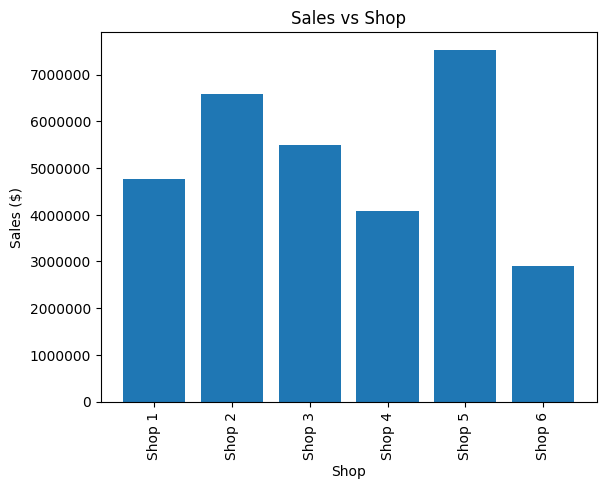

In [180]:
shops = ['Shop 1', 'Shop 2', 'Shop 3', 'Shop 4', 'Shop 5', 'Shop 6']
sales = [total_sales_shop1, total_sales_shop2, total_sales_shop3, total_sales_shop4, total_sales_shop5, total_sales_shop6]

_, ax = plt.subplots()
ax.bar(range(len(shops)), sales)
ax.set_xticks(range(len(shops)))
ax.set_xticklabels(shops, rotation="vertical")
ax.ticklabel_format(style='plain', axis='y')
ax.set(title='Sales vs Shop', ylabel='Sales ($)', xlabel='Shop')
plt.savefig('graphs/salesVsshop.png')
plt.show()

In [181]:
total_sales_shop5

7534453.559999999

**Questions** : Quel magasin possède le prix total des ventes le plus élevé ? Quel est ce prix total ?

Dans notre cas, le magasin qui possède le plus de ventes est le shop 5 qui a fait un CA total de 7'534'453 de dollars.

#### 2.2.2 Sales vs Month

In [182]:
french_months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin',
                 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

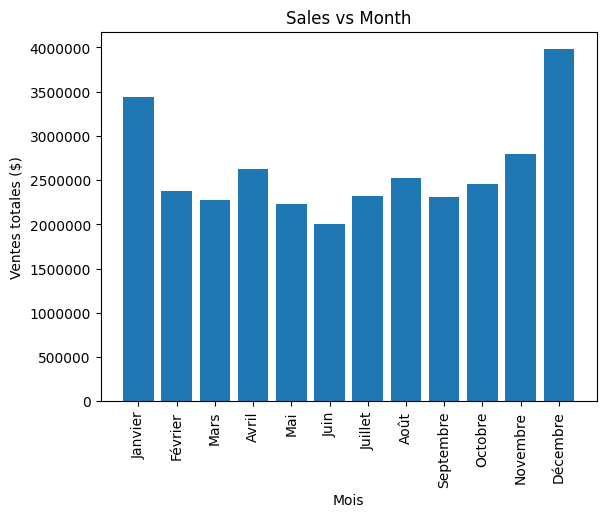

In [183]:
all_shops_data = pd.concat([df_shop1, df_shop2, df_shop3, df_shop4, df_shop5, df_shop6]) # concat tous les shops
all_shops_data['Order Date'] = pd.to_datetime(all_shops_data['Order Date']) # juste pour être sur que toutes les dates ont le meme formats
all_shops_data['Month'] = all_shops_data['Order Date'].dt.month # récuperer juste les mois --> https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column 

## Faire le nécessaire afin d'avoir le résultat
all_shops_data['Total Sales'] = all_shops_data['Price Each'] * all_shops_data['Quantity Ordered'] 
monthly_sales = all_shops_data.groupby('Month')['Total Sales'].sum()

# transformer les valeurs a des lists (problème si je le fais pas)
months = monthly_sales.index.tolist()
sales = monthly_sales.values.tolist()

month_labels = [french_months[month - 1] for month in months] # récupérer les vrais noms des mois et pas leur numéros

# plot graph
_, ax = plt.subplots()
ax.bar(month_labels, sales)
ax.set_xticks(month_labels)
ax.set_xticklabels(month_labels, rotation="vertical")
ax.ticklabel_format(style='plain', axis='y')
ax.set(title='Sales vs Month', ylabel='Ventes totales ($)', xlabel='Mois')

plt.savefig('graphs/salesVsmonth.png')
plt.show()

In [184]:
np.max(monthly_sales)

3979721.160000612

**Questions** : Quel mois possède le prix total des ventes le plus élevé ? Quel est ce prix total ?

Le mois qui a fait le plus de ventes est décembre (logique) avec un total de 3'979'721.16 de dollars



#### 2.2.3 Sales vs City

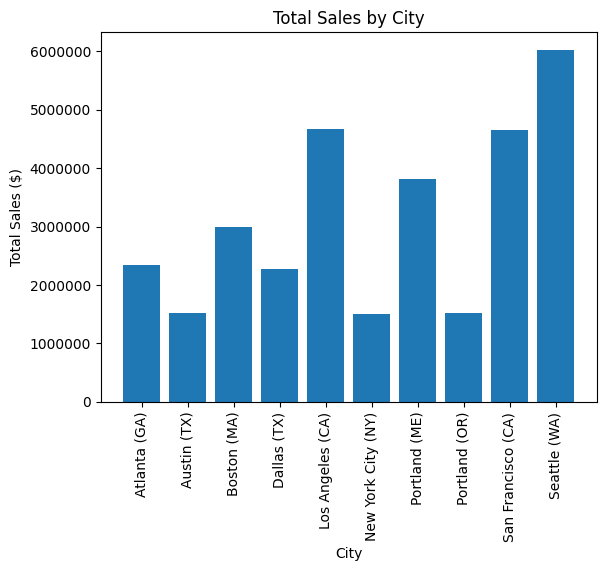

In [185]:
all_shops_data = pd.concat([df_shop1, df_shop2, df_shop3, df_shop4, df_shop5, df_shop6])
all_shops_data['City-State'] = all_shops_data['City'] + ' (' + all_shops_data['State'] + ')' 
all_shops_data['Total Sales'] = all_shops_data['Price Each'] * all_shops_data['Quantity Ordered']
city_state_sales = all_shops_data.groupby('City-State')['Total Sales'].sum()


cities = city_state_sales.index.tolist()
sales = city_state_sales.values.tolist()

_, ax = plt.subplots()
ax.bar(cities, sales)
ax.set_xticks(cities)
ax.set_xticklabels(cities, rotation="vertical")
ax.ticklabel_format(style='plain', axis='y')
ax.set(title='Total Sales by City', ylabel='Total Sales ($)', xlabel='City')

plt.savefig('graphs/salesVscity.png')

plt.show()

In [186]:
np.max(city_state_sales)

6027777.850003289

**Question** : Quelle ville possède le prix total des ventes le plus élevé ? Quel est ce prix total ?

La ville qui a fait le plus de ventes est Seattle (WA). Cette ville a fait un total de 6'027'777 de dollars de ventes. 





#### 2.2.4 Number of Orders vs Hour

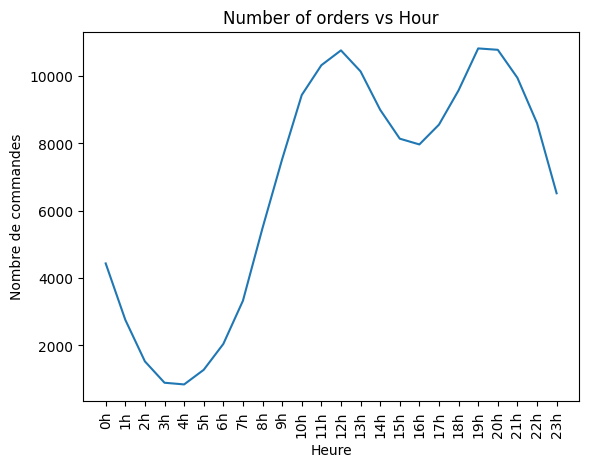

In [187]:
all_shops_data = pd.concat([df_shop1, df_shop2, df_shop3, df_shop4, df_shop5, df_shop6])
all_shops_data['Order Date'] = pd.to_datetime(all_shops_data['Order Date'])
all_shops_data['Hour'] = all_shops_data['Order Date'].dt.hour
hour_orders = all_shops_data.groupby('Hour').size()


hours = hour_orders.index.tolist()
order_counts = hour_orders.values.tolist()

_, ax = plt.subplots()
ax.plot(hours, order_counts) 
ax.set_xticks(hours)
ax.set_xticklabels([f'{hour}h' for hour in hours], rotation="vertical")
ax.ticklabel_format(style='plain', axis='y')
ax.set(title='Number of orders vs Hour', ylabel='Nombre de commandes', xlabel='Heure')

plt.savefig('graphs/orders_by_hour.png')

plt.show()

**Questions** : Quelle sont les 3 heures ayant le nombre de commandes effectuées le plus élevé ? Pour chacune de ces 3 heures, quel est le nombre de commandes effectuées ?

In [188]:
top_hours = hour_orders.sort_values(ascending=False).head(3)
top_hours

Hour
19    10821
20    10780
12    10763
dtype: int64

Comme on peut le voir dans le dataframe ci-dessous les heures ayant le plus de ventes sont l'heure 19, l'heure 20 suivi de très prêt par l'heure 12. 

**19** : 10821
**20** : 10780
**12** : 10763 

#### 2.2.5 Products sold together

In [189]:
# Get orders with multiple items
all_shops_data = pd.concat([df_shop1, df_shop2, df_shop3, df_shop4, df_shop5, df_shop6])
orders_with_multiple_items = all_shops_data[all_shops_data['Order ID'].duplicated(keep=False)] # gets only the orders with multiple items

# group products in the same orders
grouped_orders = {}
for order_id, group in orders_with_multiple_items.groupby('Order ID'):
    products = group['Product'].tolist()
    grouped_orders[order_id] = products

# get top 10
pair_counts = {}
for products in grouped_orders.values():
    products.sort()
    for i in range(len(products)):
        for j in range(i + 1, len(products)):
            pair = (products[i], products[j])
            if pair not in pair_counts:
                pair_counts[pair] = 0
            pair_counts[pair] += 1
            
top_10_pairs = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)[:10]

with open('graphs/top_10_pairs.txt', 'w') as file:
    for pair, count in top_10_pairs:
        file.write(f"{pair} : {count}\n")

for pair, count in top_10_pairs:
    print(f"{pair} : {count}")

('Google Phone', 'USB-C Charging Cable') : 927
('Lightning Charging Cable', 'iPhone') : 914
('Wired Headphones', 'iPhone') : 415
('Google Phone', 'Wired Headphones') : 355
('Apple Airpods Headphones', 'iPhone') : 351
('USB-C Charging Cable', 'Vareebadd Phone') : 298
('Bose SoundSport Headphones', 'Google Phone') : 202
('USB-C Charging Cable', 'Wired Headphones') : 154
('Lightning Charging Cable', 'Wired Headphones') : 135
('Vareebadd Phone', 'Wired Headphones') : 124


In [190]:
with open('README.md', 'w', encoding='utf-8') as readme_file:
    # Write the header
    readme_file.write("# Graph Analysis Summary\n\n")

    # Information for salesVsshop.png
    readme_file.write("## Graph: Total Sales by Shop (salesVsshop.png)\n")
    readme_file.write("![Total Sales by Shop](graphs/salesVsshop.png)\n")
    readme_file.write("### Question\n")
    readme_file.write("- Quel magasin possède le prix total des ventes le plus élevé ? Quel est ce prix total ?\n")
    readme_file.write("### Réponse\n")
    readme_file.write("- Le magasin avec le plus de ventes est le Shop 5 avec un CA total de 7’534’453 dollars.\n\n")

    # Information for salesVsmonth.png
    readme_file.write("## Graph: Total Sales by Month (salesVsmonth.png)\n")
    readme_file.write("![Total Sales by Month](graphs/salesVsmonth.png)\n")
    readme_file.write("### Question\n")
    readme_file.write("- Quel mois possède le prix total des ventes le plus élevé ? Quel est ce prix total ?\n")
    readme_file.write("### Réponse\n")
    readme_file.write("- Le mois qui a fait le plus de ventes est décembre avec un total de 3’979’721.16 dollars.\n\n")
    
    # Information for salesVscity.png
    readme_file.write("## Graph: Total Sales by City (salesVscity.png)\n")
    readme_file.write("![Total Sales by City](graphs/salesVscity.png)\n")
    readme_file.write("### Question\n")
    readme_file.write("- Quelle ville possède le prix total des ventes le plus élevé ? Quel est ce prix total ?\n")
    readme_file.write("### Réponse\n")
    readme_file.write("- La ville qui a fait le plus de ventes est Seattle (WA) avec un total de 6’027’777 dollars.\n\n")
    
    # Information for orders_by_hour.png
    readme_file.write("## Graph: Number of Orders vs Hour (orders_by_hour.png)\n")
    readme_file.write("![Number of Orders vs Hour](graphs/orders_by_hour.png)\n")
    readme_file.write("### Questions\n")
    readme_file.write("- Quelle sont les 3 heures ayant le nombre de commandes effectuées le plus élevé ? Pour chacune de ces 3 heures, quel est le nombre de commandes effectuées ?\n")
    readme_file.write("### Réponses\n")
    readme_file.write("- Les heures avec le plus de ventes sont 19h (10821 commandes), 20h (10780 commandes), et 12h (10763 commandes).\n\n")

    # Information for top_10_pairs.txt
    readme_file.write("## Top 10 Product Pairs Sold Together\n")
    readme_file.write("### List\n")
    with open('graphs/top_10_pairs.txt', 'r', encoding='utf-8') as file:
        for line in file:
            readme_file.write(f"- {line}")